In [1]:
import GCRCatalogs
import esutil
import numpy as np
import matplotlib.pyplot as plt
import h5py
from astropy.table import Table

In [14]:
f = h5py.File('/global/projecta/projectdirs/lsst/groups/SSim/DC2/cosmoDC2_v1.1.4/agn_mean_mags.h5', 'r')
nagn = f['blackHoleEddingtonRatio'].size
agn = np.zeros(nagn, dtype=[('blackHoleEddingtonRatio', 'f4'),
                          ('blackHoleMass', 'f4'),
                          ('galaxy_id', 'i8'),
                          ('mag_g_lsst_agn', 'f4'),
                          ('mag_r_lsst_agn', 'f4'),
                          ('mag_i_lsst_agn', 'f4')])
agn['blackHoleEddingtonRatio'][:] = np.array(f['blackHoleEddingtonRatio'])
agn['blackHoleMass'][:] = np.array(f['blackHoleMass'])
agn['galaxy_id'][:] = np.array(f['galaxy_id'])
agn['mag_g_lsst_agn'][:] = np.array(f['mag_g_lsst(agn)'])
agn['mag_r_lsst_agn'][:] = np.array(f['mag_r_lsst(agn)'])
agn['mag_i_lsst_agn'][:] = np.array(f['mag_i_lsst(agn)'])


In [15]:
truthcat = GCRCatalogs.load_catalog('cosmoDC2_v1.1.4_image')
quantities_wanted = ['galaxy_id',
                     'ra', 'dec', 'redshift', 
                     'mag_true_g_lsst', 'mag_true_r_lsst', 'mag_true_i_lsst', 'mag_true_z_lsst', 'mag_true_y_lsst',
                     'Mag_true_g_lsst_z0', 'Mag_true_r_lsst_z0',
                     'halo_id', 'halo_mass', 'is_central']
query = GCRCatalogs.GCRQuery('(mag_true_z_lsst < 24.0) & (is_central == True) & (halo_mass > 5e11)')
centraldata = truthcat.get_quantities(quantities_wanted, [query])

In [16]:
centraldata = Table(centraldata)

In [17]:
a, b = esutil.numpy_util.match(centraldata['galaxy_id'], agn['galaxy_id'])

In [18]:
g_tot = -2.5 * np.log10(10.**(centraldata['mag_true_g_lsst'][a]/-2.5) + 10.**(agn['mag_g_lsst_agn'][b]/-2.5))
r_tot = -2.5 * np.log10(10.**(centraldata['mag_true_r_lsst'][a]/-2.5) + 10.**(agn['mag_r_lsst_agn'][b]/-2.5))
i_tot = -2.5 * np.log10(10.**(centraldata['mag_true_i_lsst'][a]/-2.5) + 10.**(agn['mag_i_lsst_agn'][b]/-2.5))


In [23]:
print('Number of centrals selected: %d' % (len(centraldata)))
print('Number of centrals with AGN emission: %d' % (len(a)))
print('Percentage of centrals with AGN emission: %.2f%%' % (100 * float(len(a)) / float(len(centraldata))))

Number of centrals selected: 10578414
Number of centrals with AGN emission: 9375742
Percentage of centrals with AGN emission: 88.63%


In [26]:
use, = np.where((centraldata['redshift'][a] < 1.2) & (centraldata['halo_mass'][a] > 5e12))
print(use.size)

572220


Text(0.5, 1.0, 'Centrals, m>5e12, Galaxy colors')

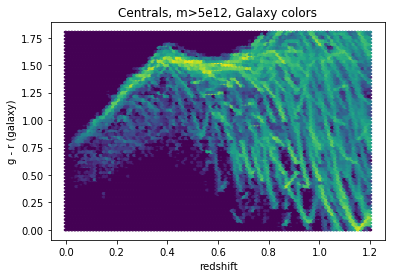

In [27]:
plt.hexbin(centraldata['redshift'][a[use]], centraldata['mag_true_g_lsst'][a[use]] - centraldata['mag_true_r_lsst'][a[use]],
          extent=[0, 1.2, 0.0, 1.8], bins='log')
plt.xlabel('redshift')
plt.ylabel('g - r (galaxy)')
plt.title('Centrals, m>5e12, Galaxy colors')

Text(0.5, 1.0, 'Centrals, m>5e12, Galaxy+AGN colors')

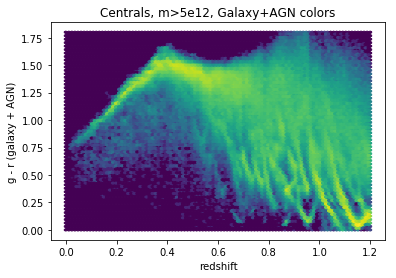

In [28]:
plt.hexbin(centraldata['redshift'][a[use]], g_tot[use] - r_tot[use],
          extent=[0, 1.2, 0.0, 1.8], bins='log')
plt.xlabel('redshift')
plt.ylabel('g - r (galaxy + AGN)')
plt.title('Centrals, m>5e12, Galaxy+AGN colors')

Text(0.5, 1.0, 'Centrals, m>5e12')

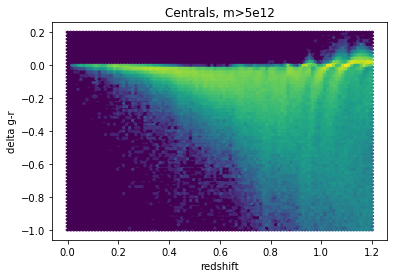

In [30]:
gmr_galaxy = centraldata['mag_true_g_lsst'][a[use]] - centraldata['mag_true_r_lsst'][a[use]]
gmr_tot = g_tot[use] - r_tot[use]
plt.hexbin(centraldata['redshift'][a[use]], gmr_tot - gmr_galaxy, bins='log', extent=[0, 1.2, -1.0, 0.2])
plt.xlabel('redshift')
plt.ylabel('delta g-r')
plt.title('Centrals, m>5e12')

Text(0.5, 1.0, 'Centrals, m>5e12')

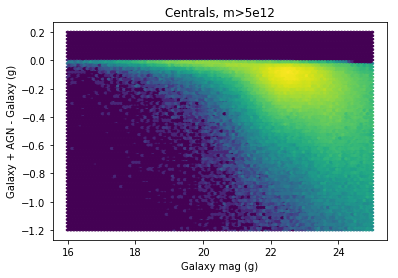

In [31]:
plt.hexbin(centraldata['mag_true_g_lsst'][a[use]], g_tot[use] - centraldata['mag_true_g_lsst'][a[use]],
          bins='log', extent=[16, 25, -1.2, 0.2])
plt.xlabel('Galaxy mag (g)')
plt.ylabel('Galaxy + AGN - Galaxy (g)')
plt.title('Centrals, m>5e12')

Text(0.5, 1.0, 'Centrals, m>5e13')

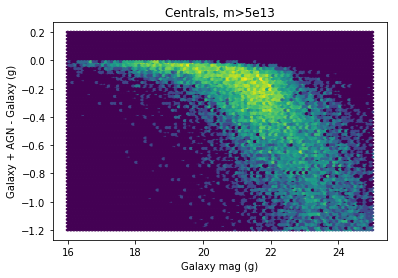

In [33]:
use2, = np.where((centraldata['redshift'][a] < 1.2) & (centraldata['halo_mass'][a] > 5e13))
plt.hexbin(centraldata['mag_true_g_lsst'][a[use2]], g_tot[use2] - centraldata['mag_true_g_lsst'][a[use2]],
          bins='log', extent=[16, 25, -1.2, 0.2])
plt.xlabel('Galaxy mag (g)')
plt.ylabel('Galaxy + AGN - Galaxy (g)')
plt.title('Centrals, m>5e13')

Text(0.5, 1.0, 'Centrals, m>5e12, Galaxy colors')

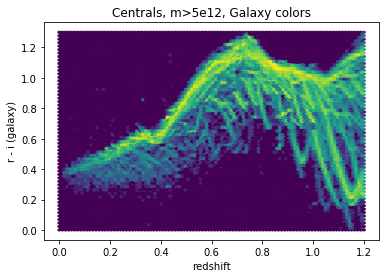

In [36]:
plt.hexbin(centraldata['redshift'][a[use]], centraldata['mag_true_r_lsst'][a[use]] - centraldata['mag_true_i_lsst'][a[use]],
          extent=[0, 1.2, 0.0, 1.3], bins='log')
plt.xlabel('redshift')
plt.ylabel('r - i (galaxy)')
plt.title('Centrals, m>5e12, Galaxy colors')

Text(0.5, 1.0, 'Centrals, m>5e12, Galaxy+AGN colors')

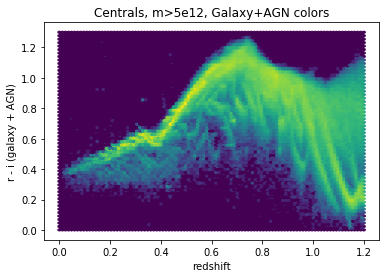

In [37]:
plt.hexbin(centraldata['redshift'][a[use]], r_tot[use] - i_tot[use],
          extent=[0, 1.2, 0.0, 1.3], bins='log')
plt.xlabel('redshift')
plt.ylabel('r - i (galaxy + AGN)')
plt.title('Centrals, m>5e12, Galaxy+AGN colors')

Text(0.5, 1.0, 'Centrals, m>5e12')

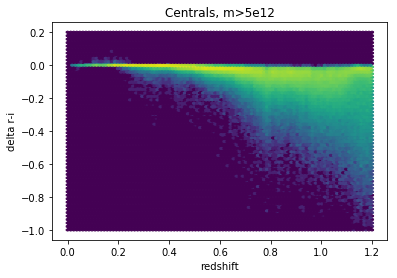

In [38]:
rmi_galaxy = centraldata['mag_true_r_lsst'][a[use]] - centraldata['mag_true_i_lsst'][a[use]]
rmi_tot = r_tot[use] - i_tot[use]
plt.hexbin(centraldata['redshift'][a[use]], rmi_tot - rmi_galaxy, bins='log', extent=[0, 1.2, -1.0, 0.2])
plt.xlabel('redshift')
plt.ylabel('delta r-i')
plt.title('Centrals, m>5e12')

Text(0.5, 1.0, 'Centrals, m>5e13')

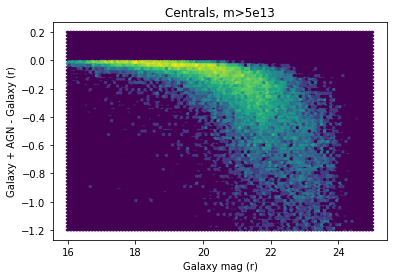

In [40]:
use2, = np.where((centraldata['redshift'][a] < 1.2) & (centraldata['halo_mass'][a] > 5e13))
plt.hexbin(centraldata['mag_true_r_lsst'][a[use2]], r_tot[use2] - centraldata['mag_true_r_lsst'][a[use2]],
          bins='log', extent=[16, 25, -1.2, 0.2])
plt.xlabel('Galaxy mag (r)')
plt.ylabel('Galaxy + AGN - Galaxy (r)')
plt.title('Centrals, m>5e13')

Text(0.5, 1.0, 'Centrals, m>5e13')

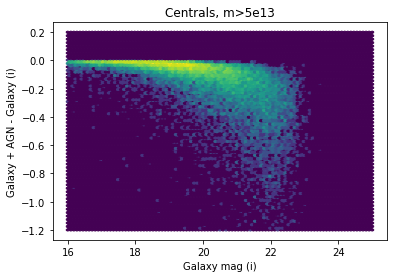

In [41]:
use2, = np.where((centraldata['redshift'][a] < 1.2) & (centraldata['halo_mass'][a] > 5e13))
plt.hexbin(centraldata['mag_true_i_lsst'][a[use2]], i_tot[use2] - centraldata['mag_true_i_lsst'][a[use2]],
          bins='log', extent=[16, 25, -1.2, 0.2])
plt.xlabel('Galaxy mag (i)')
plt.ylabel('Galaxy + AGN - Galaxy (i)')
plt.title('Centrals, m>5e13')

In [42]:
query = GCRCatalogs.GCRQuery('(mag_true_z_lsst < 24.0) & (is_central == False) & (halo_mass > 5e13)')
satellitedata = truthcat.get_quantities(quantities_wanted, [query])
satellitedata = Table(satellitedata)

In [43]:
aa, bb = esutil.numpy_util.match(satellitedata['galaxy_id'], agn['galaxy_id'])
g_tot_sat = -2.5 * np.log10(10.**(satellitedata['mag_true_g_lsst'][aa]/-2.5) + 10.**(agn['mag_g_lsst_agn'][bb]/-2.5))
r_tot_sat = -2.5 * np.log10(10.**(satellitedata['mag_true_r_lsst'][aa]/-2.5) + 10.**(agn['mag_r_lsst_agn'][bb]/-2.5))
i_tot_sat = -2.5 * np.log10(10.**(satellitedata['mag_true_i_lsst'][aa]/-2.5) + 10.**(agn['mag_i_lsst_agn'][bb]/-2.5))

In [44]:
print('Number of satellites selected: %d' % (len(satellitedata)))
print('Number of satellites with AGN emission: %d' % (len(aa)))
print('Percentage of satellites with AGN emission: %.2f%%' % (100 * float(len(aa)) / float(len(satellitedata))))

Number of satellites selected: 881143
Number of satellites with AGN emission: 469508
Percentage of satellites with AGN emission: 53.28%


In [47]:
use_sat, = np.where((satellitedata['redshift'][aa] < 1.2))

Text(0.5, 1.0, 'Satellites, m>5e13, Galaxy colors')

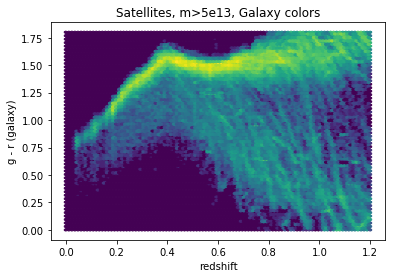

In [50]:
plt.hexbin(satellitedata['redshift'][aa[use_sat]], 
           satellitedata['mag_true_g_lsst'][aa[use_sat]] - satellitedata['mag_true_r_lsst'][aa[use_sat]],
          extent=[0, 1.2, 0.0, 1.8], bins='log')
plt.xlabel('redshift')
plt.ylabel('g - r (galaxy)')
plt.title('Satellites, m>5e13, Galaxy colors')

Text(0.5, 1.0, 'Satellites, m>5e13, Total colors')

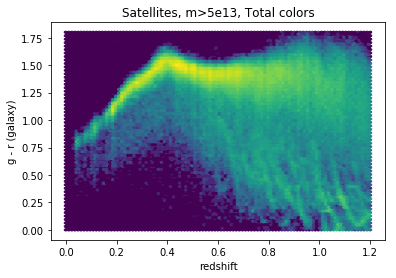

In [51]:
plt.hexbin(satellitedata['redshift'][aa[use_sat]], 
           g_tot_sat[use_sat] - r_tot_sat[use_sat],
          extent=[0, 1.2, 0.0, 1.8], bins='log')
plt.xlabel('redshift')
plt.ylabel('g - r (galaxy)')
plt.title('Satellites, m>5e13, Total colors')

Text(0.5, 1.0, 'Satellites, m>5e13')

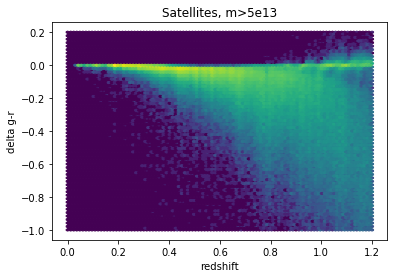

In [52]:
gmr_galaxy = satellitedata['mag_true_g_lsst'][aa[use_sat]] - satellitedata['mag_true_r_lsst'][aa[use_sat]]
gmr_tot = g_tot_sat[use_sat] - r_tot_sat[use_sat]
plt.hexbin(satellitedata['redshift'][aa[use_sat]], gmr_tot - gmr_galaxy, bins='log', extent=[0, 1.2, -1.0, 0.2])
plt.xlabel('redshift')
plt.ylabel('delta g-r')
plt.title('Satellites, m>5e13')

Text(0.5, 1.0, 'Satellites, m>5e13')

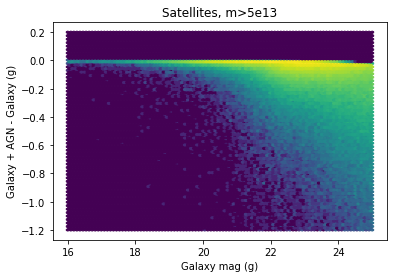

In [53]:
plt.hexbin(satellitedata['mag_true_g_lsst'][aa[use_sat]], g_tot_sat[use_sat] - satellitedata['mag_true_g_lsst'][aa[use_sat]],
          bins='log', extent=[16, 25, -1.2, 0.2])
plt.xlabel('Galaxy mag (g)')
plt.ylabel('Galaxy + AGN - Galaxy (g)')
plt.title('Satellites, m>5e13')

Text(0.5, 1.0, 'Satellites, m>5e13')

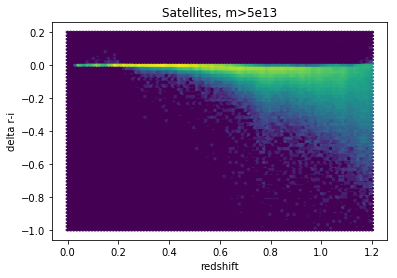

In [54]:
rmi_galaxy = satellitedata['mag_true_r_lsst'][aa[use_sat]] - satellitedata['mag_true_i_lsst'][aa[use_sat]]
rmi_tot = r_tot_sat[use_sat] - i_tot_sat[use_sat]
plt.hexbin(satellitedata['redshift'][aa[use_sat]], rmi_tot - rmi_galaxy, bins='log', extent=[0, 1.2, -1.0, 0.2])
plt.xlabel('redshift')
plt.ylabel('delta r-i')
plt.title('Satellites, m>5e13')

Text(0.5, 0, 'Delta r-i, red satellites, 0.6 < z < 0.7')

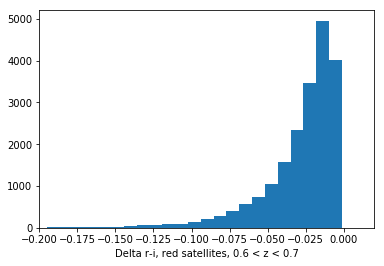

In [58]:
# Look at red satellites in the 0.6 < z < 0.7 redshift range
in_range, = np.where((satellitedata['redshift'][aa[use_sat]] > 0.6) & 
                     (satellitedata['redshift'][aa[use_sat]] < 0.7) &
                    ((satellitedata['Mag_true_g_lsst_z0'][aa[use_sat]] - satellitedata['Mag_true_r_lsst_z0'][aa[use_sat]]) > 0.65))
plt.hist(rmi_tot[in_range] - rmi_galaxy[in_range], bins=100)
plt.xlim(-0.2, 0.02)
plt.xlabel('Delta r-i, red satellites, 0.6 < z < 0.7')

In [59]:
# This is a *lot* of extra scatter in the red sequence